In [1]:
import pandas as pd
import numpy as no
from matplotlib import pyplot as plt

In [2]:
meta_data = pd.read_csv("Data/symbols_valid_meta.csv")

In [31]:
meta_data.shape[0]

8049

In [33]:
meta_data[meta_data.ETF == "Y"].shape[0]

2165

In [34]:
meta_data[meta_data.ETF == "N"].shape[0]

5884

In [37]:
meta_data[meta_data.Symbol == "MBB"]

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
4495,Y,MBB,iShares MBS ETF,Q,G,Y,100.0,N,N,NaN,MBB,N


In [28]:
vanguard_sp500 = pd.read_csv("Data/etfs/VOO.csv")
vanguard_sp500

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-09,102.500000,102.500000,101.139999,101.320000,83.143929,26500
1,2010-09-10,101.680000,101.860001,101.300003,101.779999,83.521400,8600
2,2010-09-13,102.959999,103.139999,102.500000,103.059998,84.571770,33700
3,2010-09-14,102.839996,103.480003,102.379997,103.040001,84.555374,59400
4,2010-09-15,102.620003,103.379997,102.400002,103.300003,84.768715,9200
...,...,...,...,...,...,...,...
2402,2020-03-26,229.270004,241.440002,228.850006,240.240005,240.240005,12411100
2403,2020-03-27,232.699997,239.639999,230.660004,232.860001,232.860001,11170600
2404,2020-03-30,234.919998,241.100006,232.970001,240.389999,240.389999,8727800
2405,2020-03-31,239.449997,241.940002,235.440002,236.820007,236.820007,10386300


In [14]:
vanguard_sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2.407000e+03
mean,188.163440,189.017349,187.204894,188.183440,173.555402,1.789512e+06
std,53.389700,53.600466,53.158522,53.388669,58.300961,1.946484e+06
min,99.139999,101.860001,98.239998,100.339996,83.143929,8.600000e+03
25%,137.300003,137.790001,136.930000,137.400002,118.868755,5.480500e+05
50%,187.750000,188.779999,187.000000,187.929993,170.456757,1.455400e+06
75%,233.335007,234.580002,231.574997,233.250000,223.689667,2.352300e+06
max,310.420013,311.589996,310.119995,310.920013,309.467224,2.466930e+07


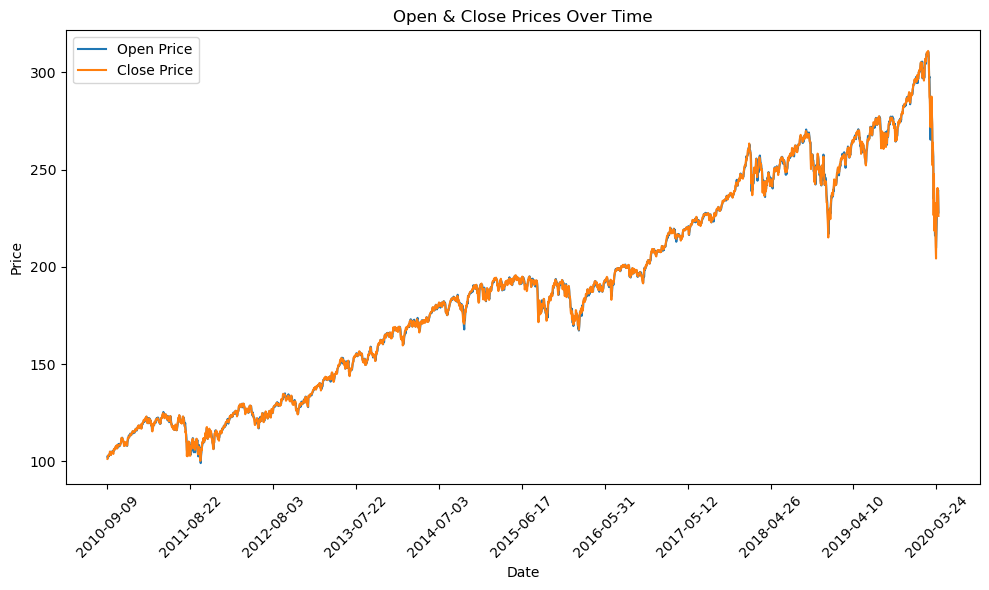

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(vanguard_sp500['Date'], vanguard_sp500['Open'], label='Open Price')
plt.plot(vanguard_sp500['Date'], vanguard_sp500['Close'], label='Close Price')

plt.title('Open & Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')


num_ticks = 10 
plt.xticks(ticks=vanguard_sp500['Date'][::len(vanguard_sp500)//num_ticks], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

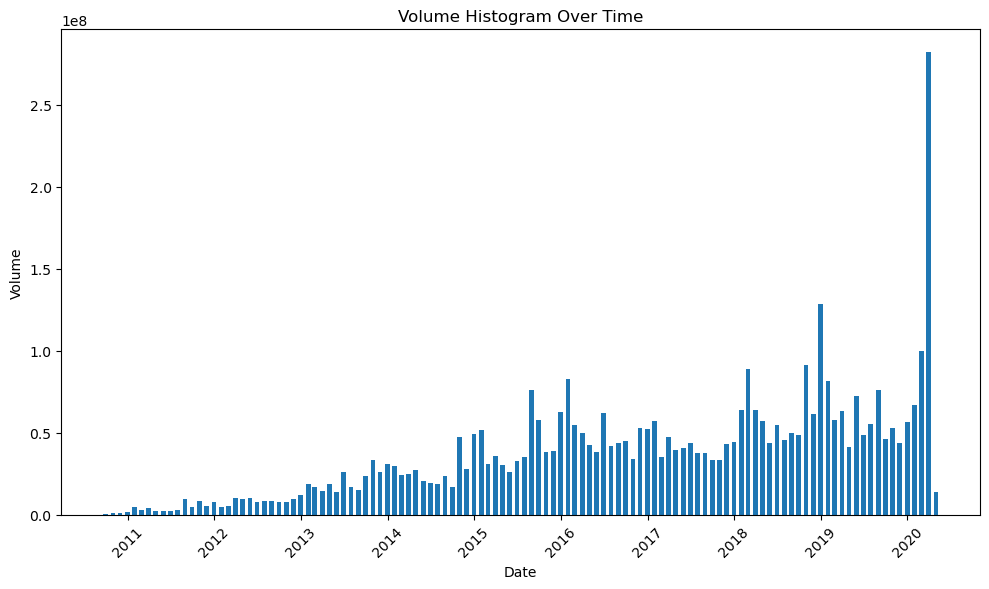

In [26]:
vanguard_sp500['Date'] = pd.to_datetime(vanguard_sp500['Date'])

vanguard_sp500.set_index('Date', inplace=True)
df_resampled = vanguard_sp500['Volume'].resample('M').sum()

plt.figure(figsize=(10, 6))
plt.bar(df_resampled.index, df_resampled, width=20, align='center', label='Volume')

plt.title('Volume Histogram Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()